We are going to train a model that can predict wether a child has Kyphosis after their spinal surgery. We will be using a single decision tree and random forests. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

## Get the Data
Now we import the data from the CSV file into a dataframe. The attributes of our set are the Age of the child (in months), the Number (of vertebrae) and the Start (top vertebra) operated on.

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
#...insert your code

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
#...insert your code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
#...insert your code

absent     64
present    17
Name: Kyphosis, dtype: int64

## Exploratory Data Analysis (EDA)

We'll just check out a simple pairplot for this small dataset.

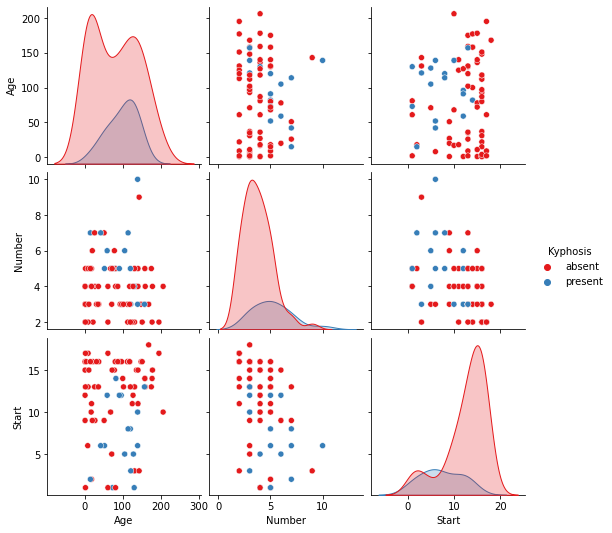

In [9]:
#...insert your code

## Train Test Split

Let's split up the data into a training set and a test set.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#...insert your code

In [32]:
#...insert your code

## Decision Trees

We'll start just by training a single decision tree.

Now we choose from sklearn.tree the decision tree classifier model

In [33]:
from sklearn.tree import DecisionTreeClassifier

Create a model clalled dtree 

In [34]:
#...insert your code

Fit the model to the training data

In [35]:
#...insert your code

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Prediction and Evaluation 

Let us evaluate now, how well our decision tree model is able to predict based on the attributes (Age, Number, Start), whether or not Kyphosis is present at the child or not.

In [36]:
#...insert your code

sklearn.metrics provides the function confusion_matrix that compares the predicted values with the actual lable values, and outputs the confusion_matrix.

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
#...insert your code

[[15  4]
 [ 5  1]]


Similarly, sklearn.metrics provides the function classification_report that outputs the main classification metrics: such as precision, recall, f1-score, accuracy, etc. You can read more about it in the sklearn documantation here https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [39]:
#...insert your code

              precision    recall  f1-score   support

      absent       0.75      0.79      0.77        19
     present       0.20      0.17      0.18         6

    accuracy                           0.64        25
   macro avg       0.47      0.48      0.48        25
weighted avg       0.62      0.64      0.63        25



## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [40]:
# from sklearn import tree
# fig, ax = plt.subplots(figsize=(12, 12))  # whatever size you want
# tree.plot_tree(dtree, ax=ax)
# plt.show()


In [41]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

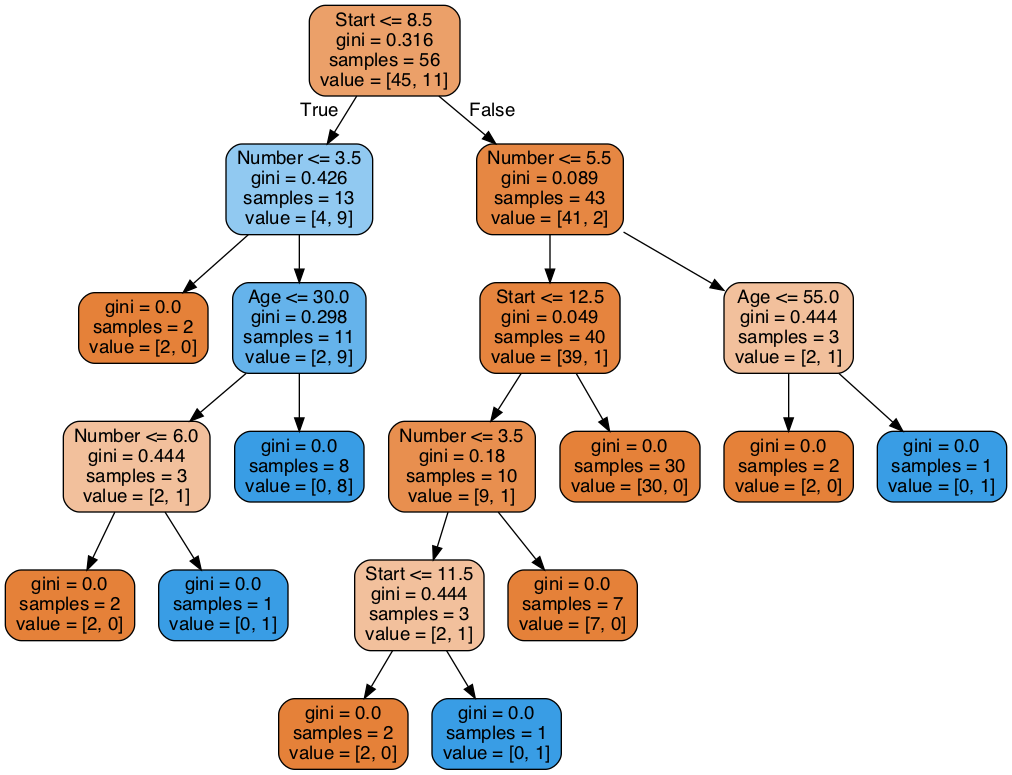

In [42]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

#### Now let's compare the decision tree model to a random forest.
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement. You can read more about it here https://scikit-learn.org/stable/modules/ensemble.html#forest

From sklearn.ensemble, choose the Random Forest classifier. Note that, this classifier is under ensemble, since it builds an emsemble of trees, so it falls under the category of ensemble learning. 

In [43]:
from sklearn.ensemble import RandomForestClassifier
#...insert your code

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
#...insert your code

In [45]:
#...insert your code

[[17  2]
 [ 5  1]]


In [46]:
#...insert your code

              precision    recall  f1-score   support

      absent       0.77      0.89      0.83        19
     present       0.33      0.17      0.22         6

    accuracy                           0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25

